Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

In [1]:
# Import Libraries¶
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/DheerajKumar97/Bike-Sharing-Demand-Dataset/master/hour.csv")
df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [32]:
df.head(30)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  2011-01-01       1   0     1   0        0        6           0   
1         2  2011-01-01       1   0     1   1        0        6           0   
2         3  2011-01-01       1   0     1   2        0        6           0   
3         4  2011-01-01       1   0     1   3        0        6           0   
4         5  2011-01-01       1   0     1   4        0        6           0   
5         6  2011-01-01       1   0     1   5        0        6           0   
6         7  2011-01-01       1   0     1   6        0        6           0   
7         8  2011-01-01       1   0     1   7        0        6           0   
8         9  2011-01-01       1   0     1   8        0        6           0   
9        10  2011-01-01       1   0     1   9        0        6           0   
10       11  2011-01-01       1   0     1  10        0        6           0   
11       12  2011-01-01       1   0     1  11        0        6           0   
12       13  2011-01-01       1   0     1  12        0        6           0   
13       14  2011-01-01       1   0     1  13        0        6           0   
14       15  2011-01-01       1   0     1  14        0        6           0   
15       16  2011-01-01       1   0     1  15        0        6           0   
16       17  2011-01-01       1   0     1  16        0        6           0   
17       18  2011-01-01       1   0     1  17        0        6           0   
18       19  2011-01-01       1   0     1  18        0        6           0   
19       20  2011-01-01       1   0     1  19        0        6           0   
20       21  2011-01-01       1   0     1  20        0        6           0   
21       22  2011-01-01       1   0     1  21        0        6           0   
22       23  2011-01-01       1   0     1  22        0        6           0   
23       24  2011-01-01       1   0     1  23        0        6           0   
24       25  2011-01-02       1   0     1   0        0        0           0   
25       26  2011-01-02       1   0     1   1        0        0           0   
26       27  2011-01-02       1   0     1   2        0        0           0   
27       28  2011-01-02       1   0     1   3        0        0           0   
28       29  2011-01-02       1   0     1   4        0        0           0   
29       30  2011-01-02       1   0     1   6        0        0           0   

    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0            1  0.24  0.2879  0.81     0.0000       3          13   16  
1            1  0.22  0.2727  0.80     0.0000       8          32   40  
2            1  0.22  0.2727  0.80     0.0000       5          27   32  
3            1  0.24  0.2879  0.75     0.0000       3          10   13  
4            1  0.24  0.2879  0.75     0.0000       0           1    1  
5            2  0.24  0.2576  0.75     0.0896       0           1    1  
6            1  0.22  0.2727  0.80     0.0000       2           0    2  
7            1  0.20  0.2576  0.86     0.0000       1           2    3  
8            1  0.24  0.2879  0.75     0.0000       1           7    8  
9            1  0.32  0.3485  0.76     0.0000       8           6   14  
10           1  0.38  0.3939  0.76     0.2537      12          24   36  
11           1  0.36  0.3333  0.81     0.2836      26          30   56  
12           1  0.42  0.4242  0.77     0.2836      29          55   84  
13           2  0.46  0.4545  0.72     0.2985      47          47   94  
14           2  0.46  0.4545  0.72     0.2836      35          71  106  
15           2  0.44  0.4394  0.77     0.2985      40          70  110  
16           2  0.42  0.4242  0.82     0.2985      41          52   93  
17           2  0.44  0.4394  0.82     0.2836      15          52   67  
18           3  0.42  0.4242  0.88     0.2537       9          26   35  
19           3  0.42  0.4242  0.88     0.2537       6          31   37  
20           2  0.40 

# Data Visualization

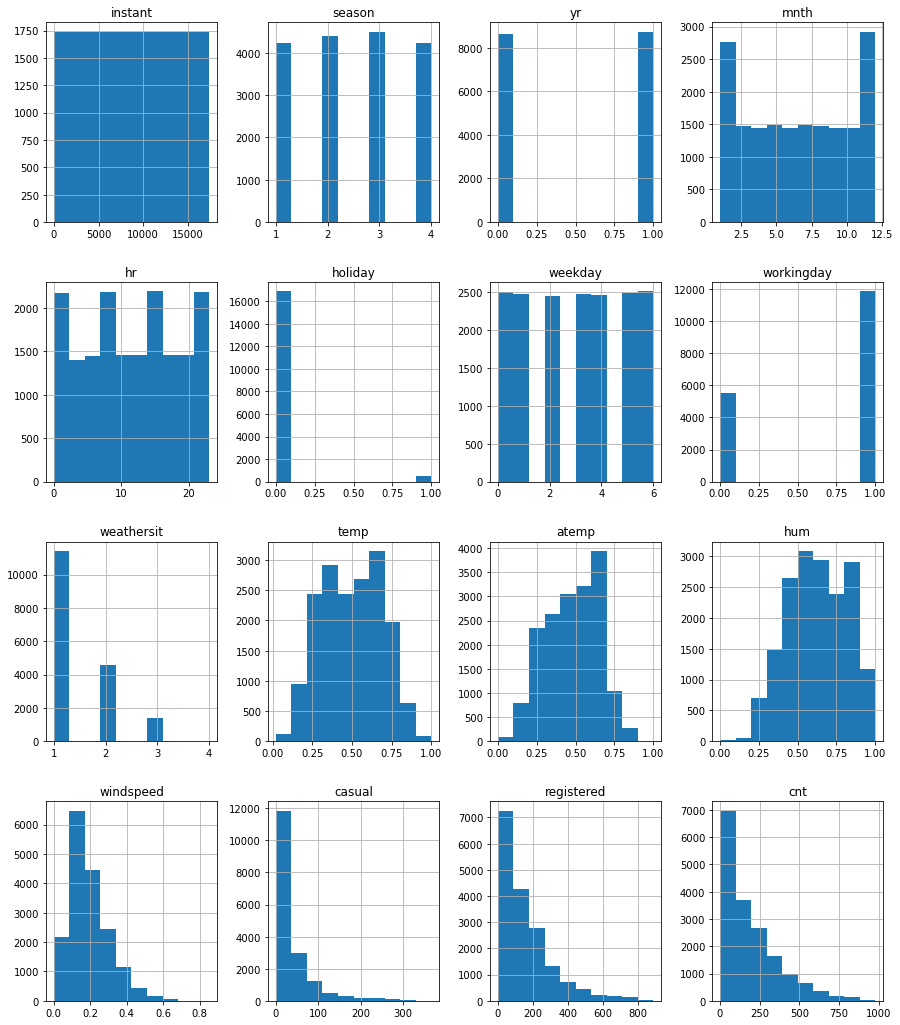

In [4]:
def show_hist(x):
    plt.rcParams["figure.figsize"] = 15,18
    x.hist()
show_hist(df)

In [6]:
def Show_DisPlot(x):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,7))
    sns.distplot(x, bins = 25)

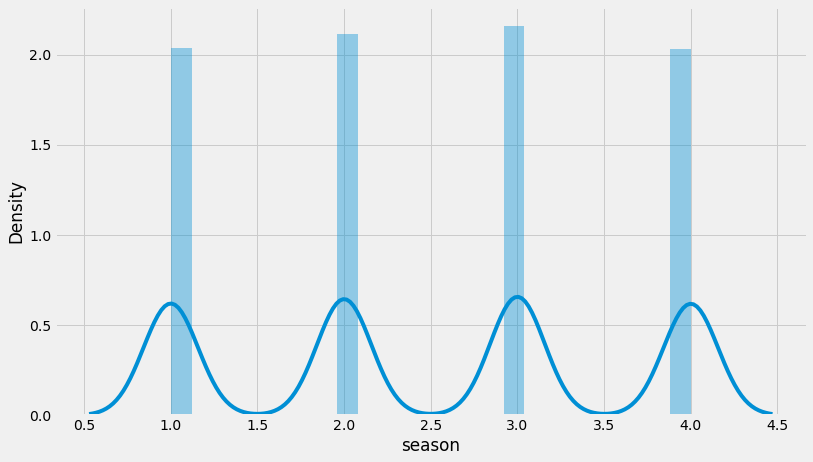

In [7]:
Show_DisPlot(df.season)

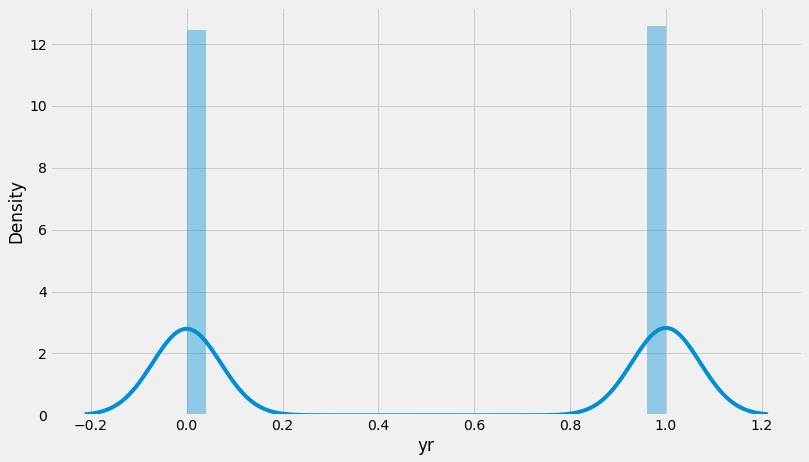

In [8]:
Show_DisPlot(df.yr)

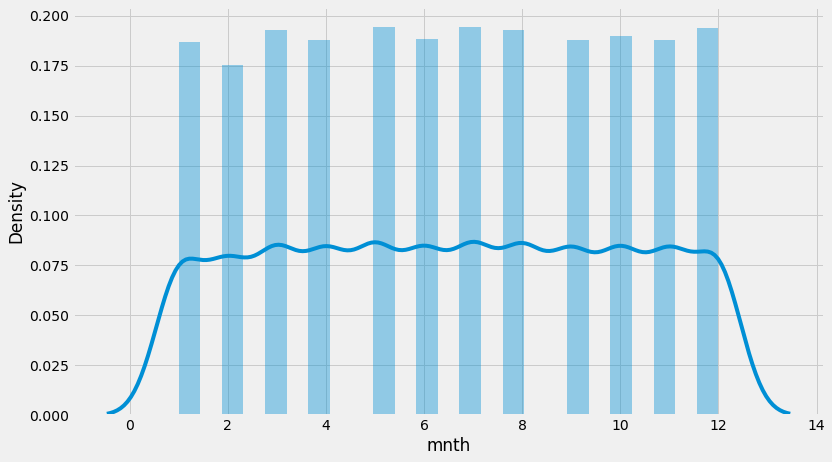

In [9]:
Show_DisPlot(df.mnth)

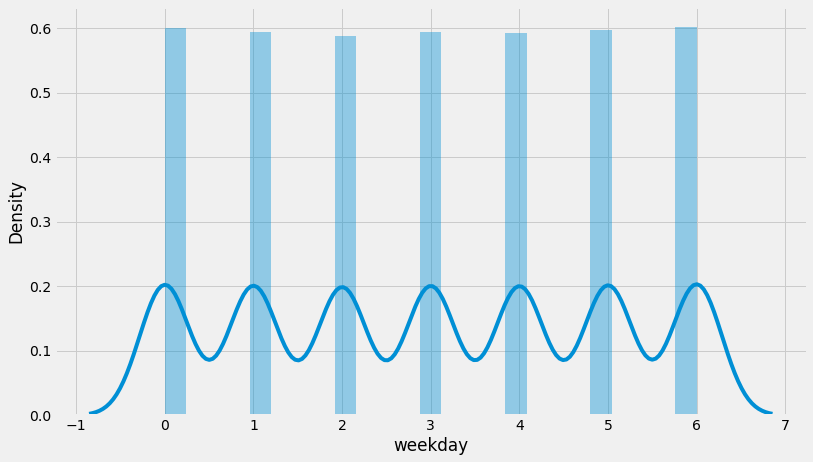

In [10]:
Show_DisPlot(df.weekday)

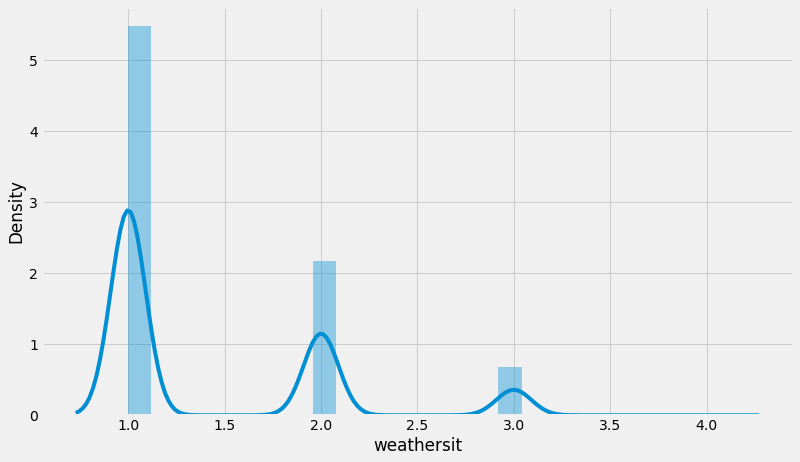

In [11]:
Show_DisPlot(df.weathersit)

In [13]:
def Show_Hist(x,y):
    x.hist(bins=50, figsize=(12,8), by=y)

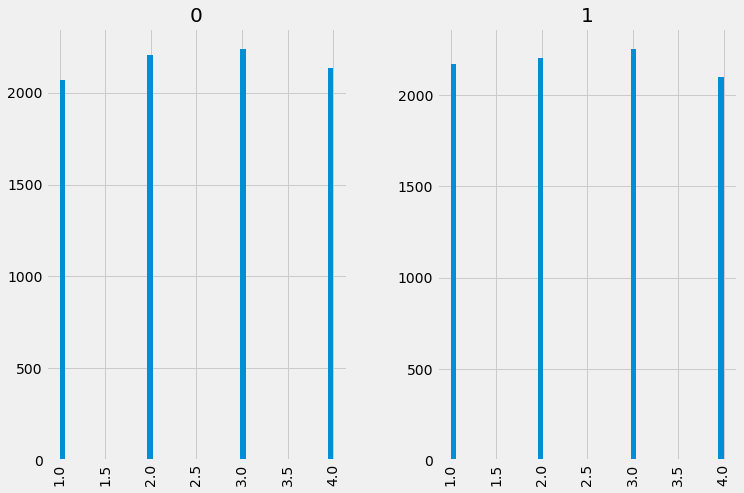

In [14]:
Show_Hist(df.season,df.yr)

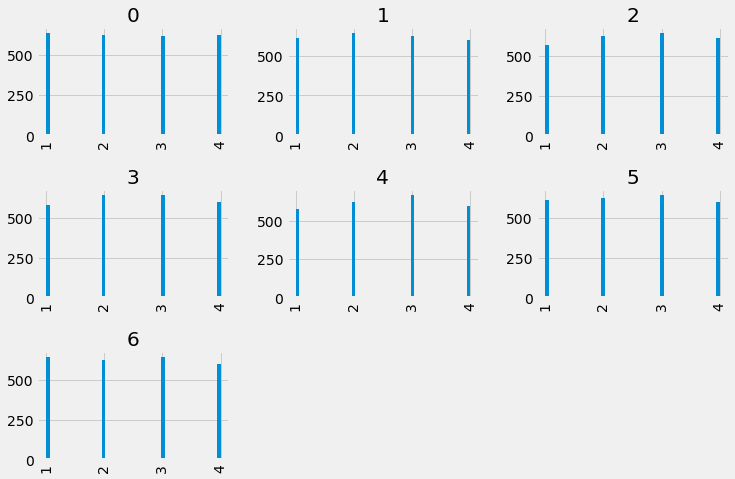

In [15]:
Show_Hist(df.season,df.weekday)

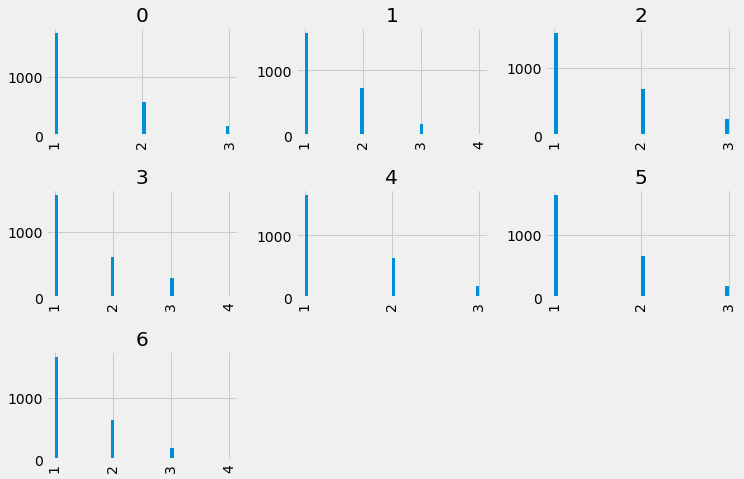

In [16]:
Show_Hist(df.weathersit,df.weekday)

In [17]:
def Show_CountPlot(x):
    fig_dims = (18, 8)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x,ax=ax)

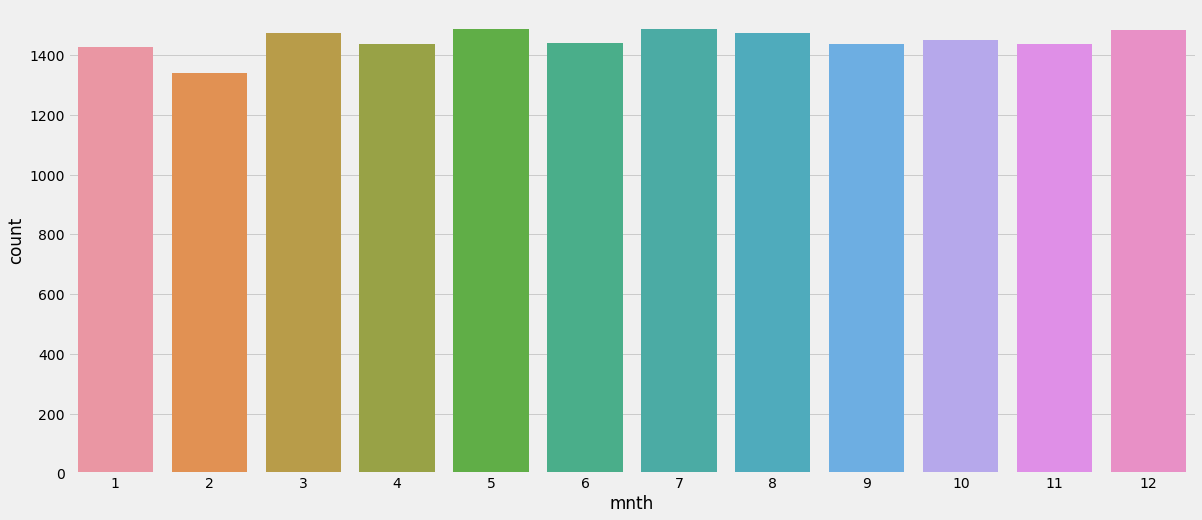

In [18]:
Show_CountPlot(df.mnth)

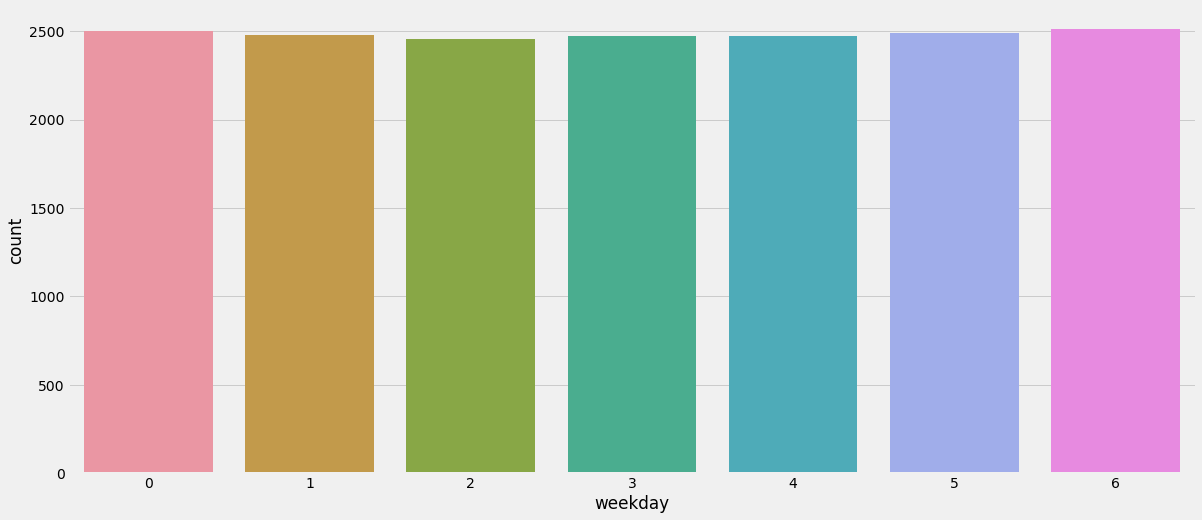

In [19]:
Show_CountPlot(df.weekday)

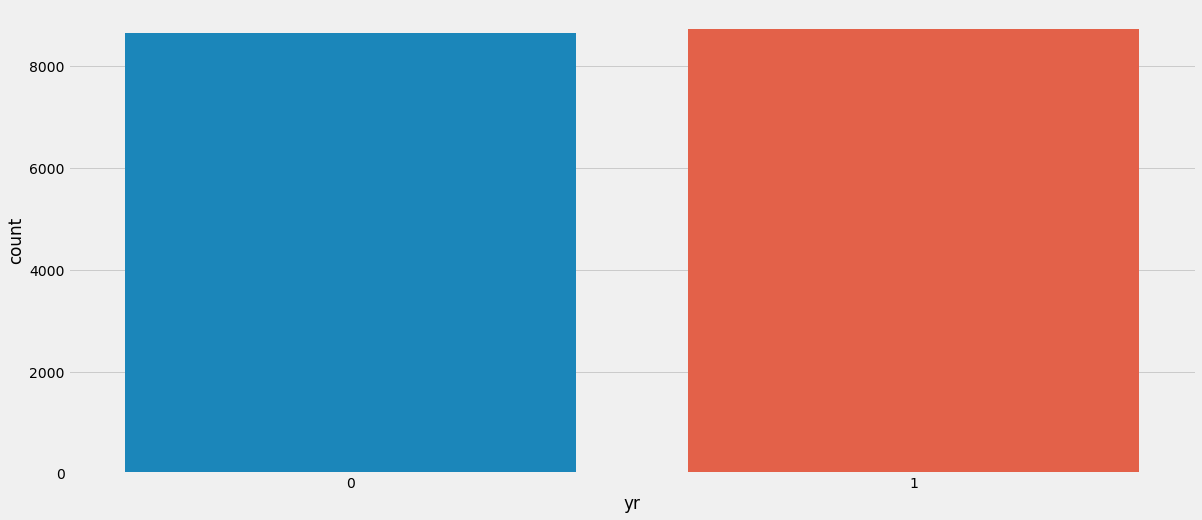

In [20]:
Show_CountPlot(df.yr)

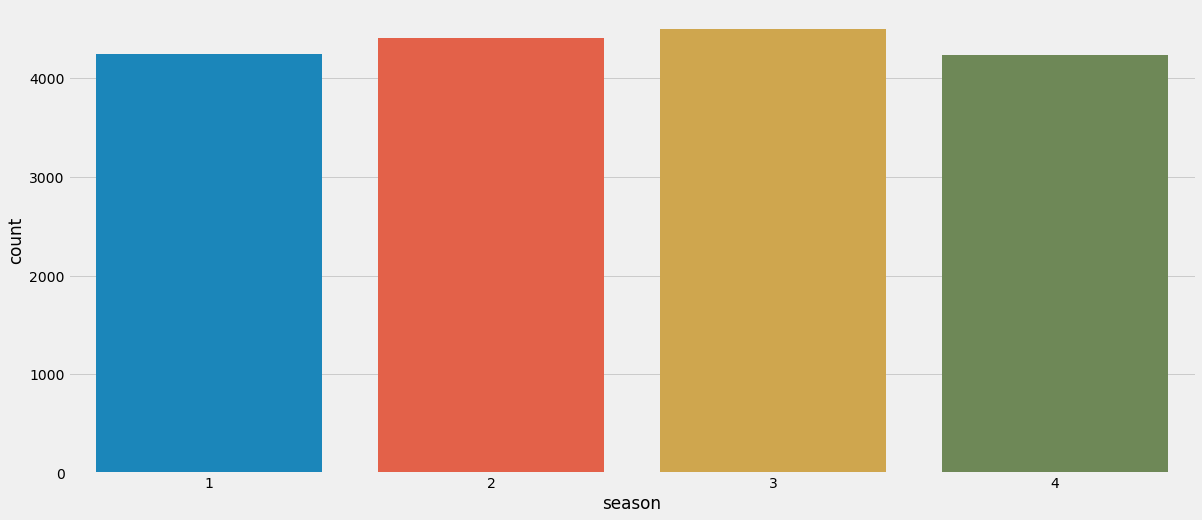

In [21]:
Show_CountPlot(df.season)

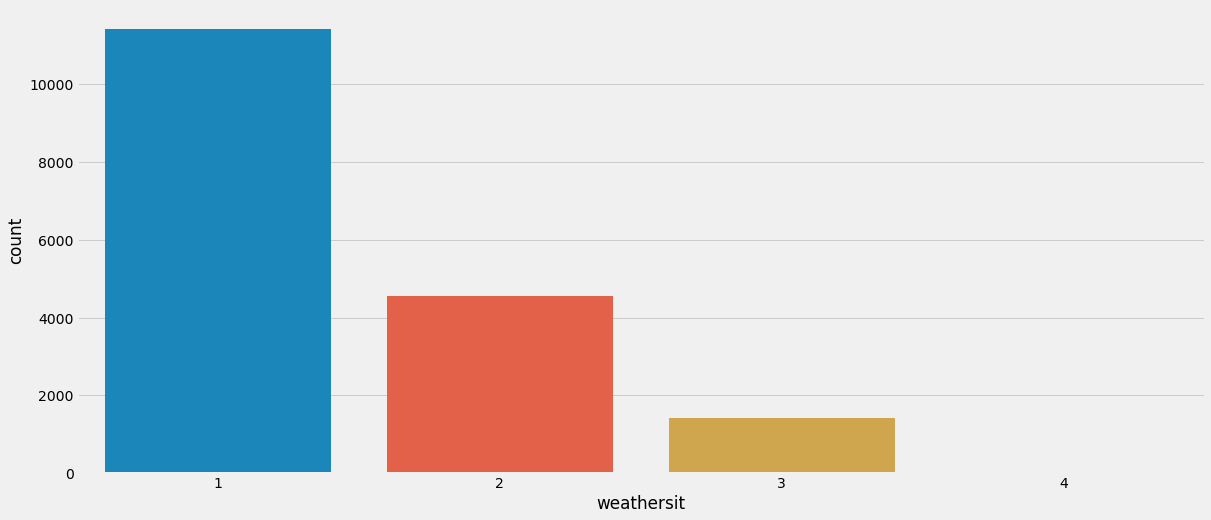

In [22]:
Show_CountPlot(df.weathersit)

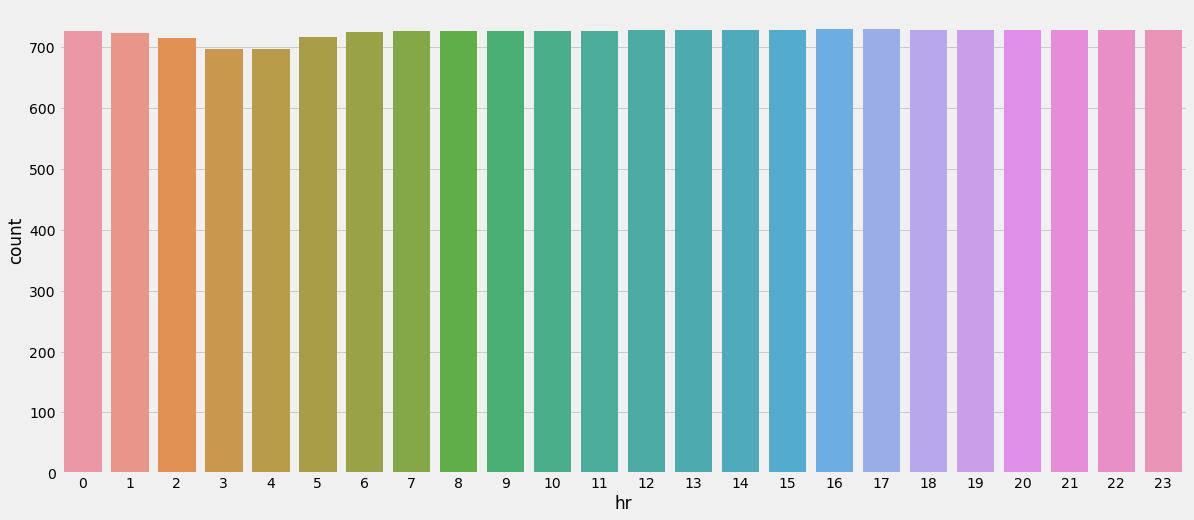

In [23]:
Show_CountPlot(df.hr)

In [24]:
def Show_BoxPlot(X,Y):
    fig_dims = (18, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.boxplot(x=X, y=Y,ax=ax)

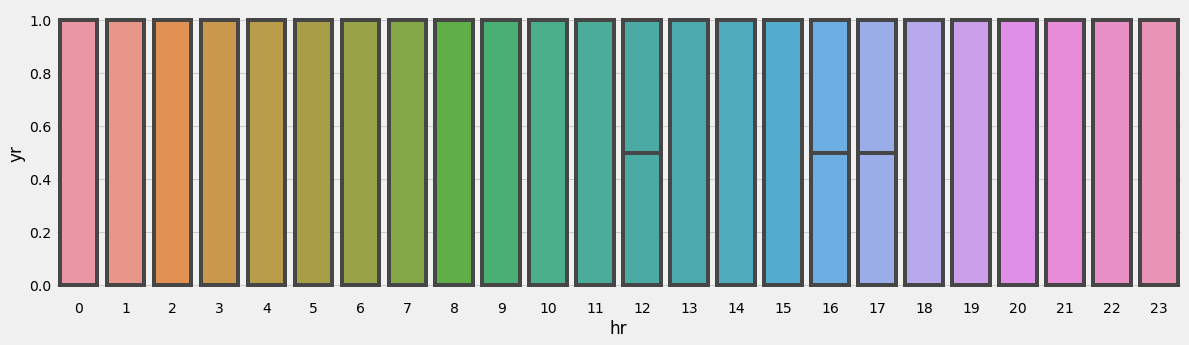

In [25]:
Show_BoxPlot(df.hr,df.yr)

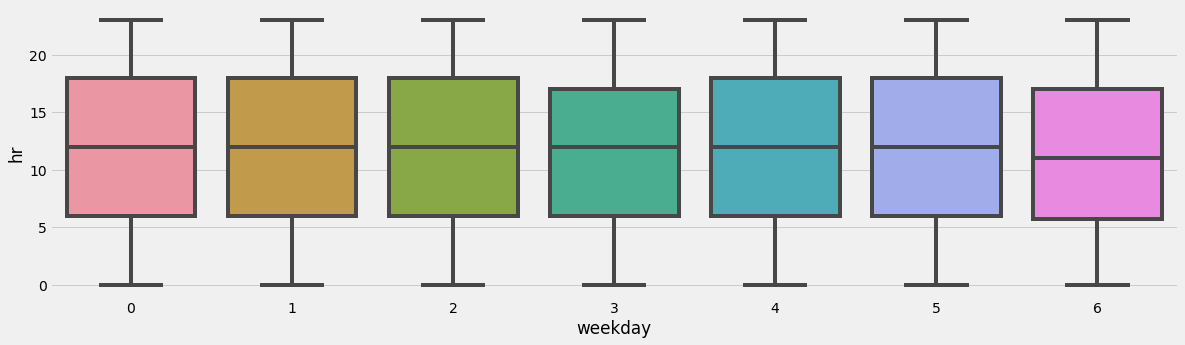

In [26]:
Show_BoxPlot(df.weekday,df.hr)

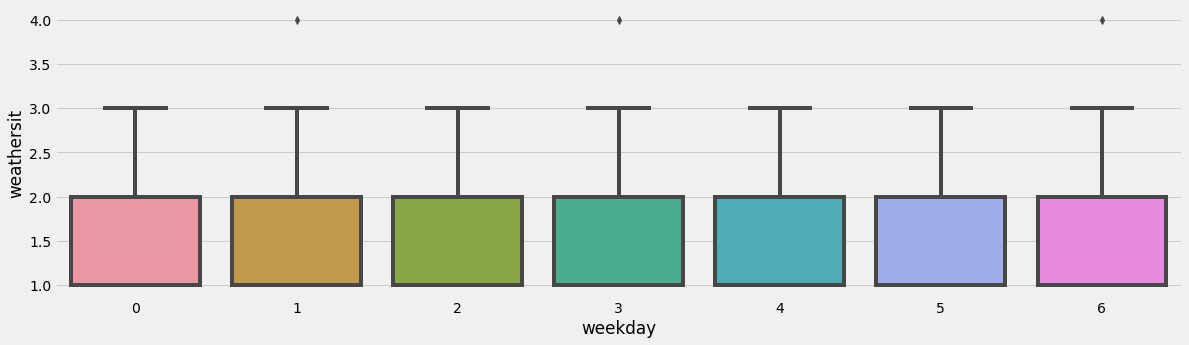

In [27]:
Show_BoxPlot(df.weekday,df.weathersit)

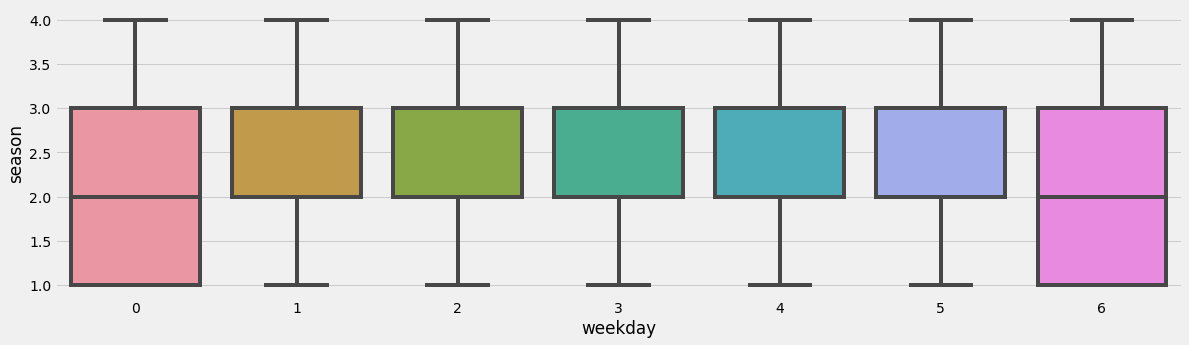

In [28]:
Show_BoxPlot(df.weekday,df.season)

In [29]:
def Show_Bar_Plot(x,y,z,data):
    fig_dims = (18, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.barplot(x=x, y=y, hue=z,
                        data=data, palette="muted",ax=ax)

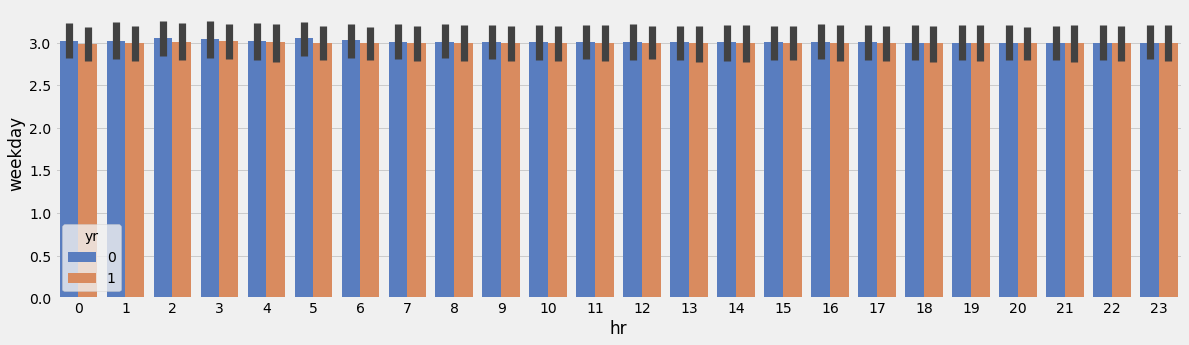

In [30]:
Show_Bar_Plot(df.hr,df.weekday,df.yr,df)

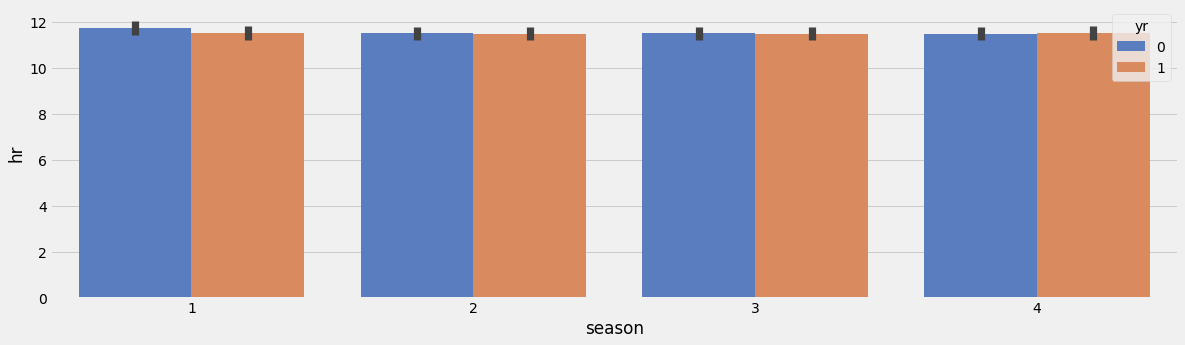

In [33]:
Show_Bar_Plot(df.season,df.hr,df.yr,df)

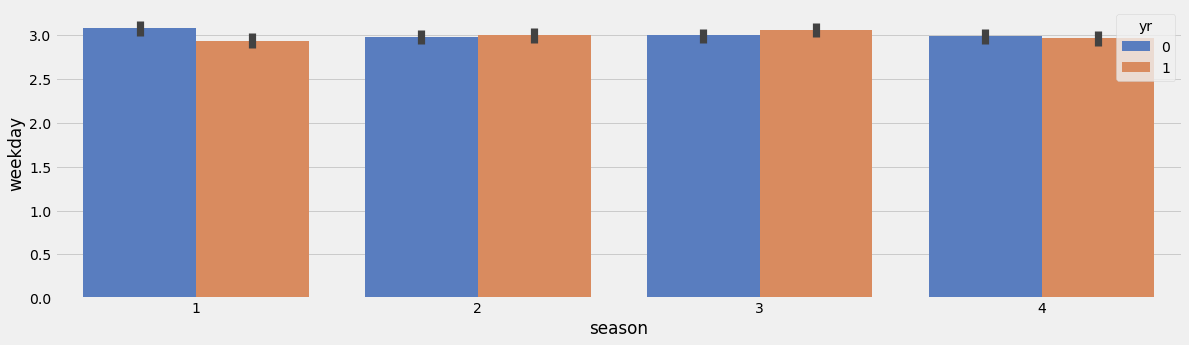

In [34]:
Show_Bar_Plot(df.season,df.weekday,df.yr,df)

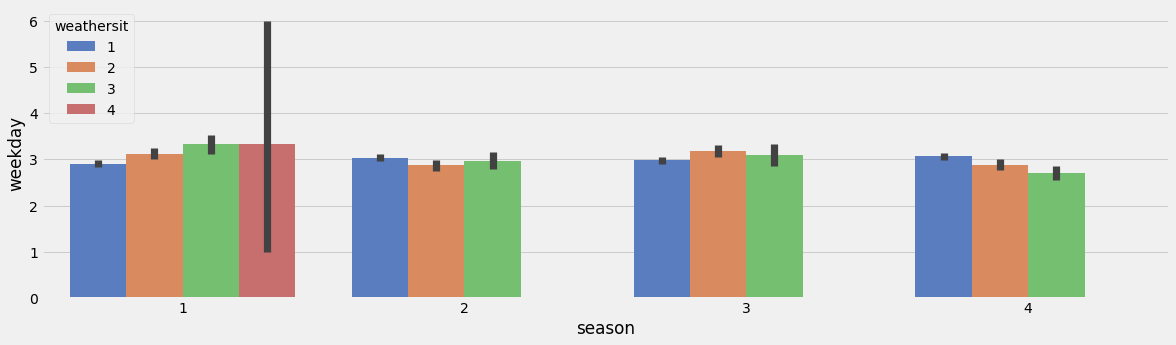

In [35]:
Show_Bar_Plot(df.season,df.weekday,df.weathersit,df)

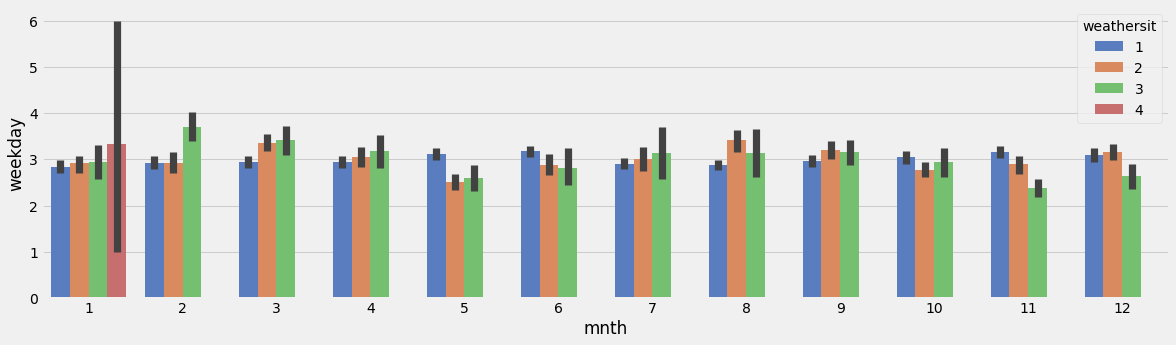

In [36]:
Show_Bar_Plot(df.mnth,df.weekday,df.weathersit,df)

In [38]:
def Show_Violin_Plot(x,y,data):
    fig_dims = (18, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.violinplot(x=x,y=y,data=data,ax=ax)

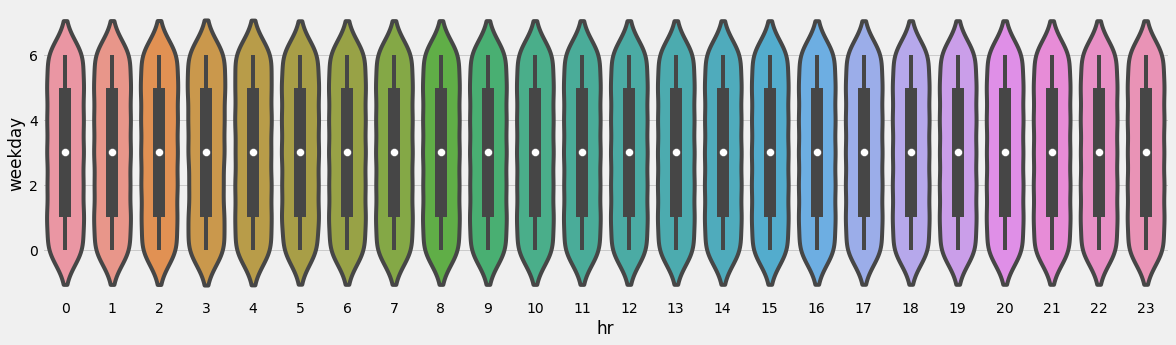

In [39]:
Show_Violin_Plot(df.hr,df.weekday,df)

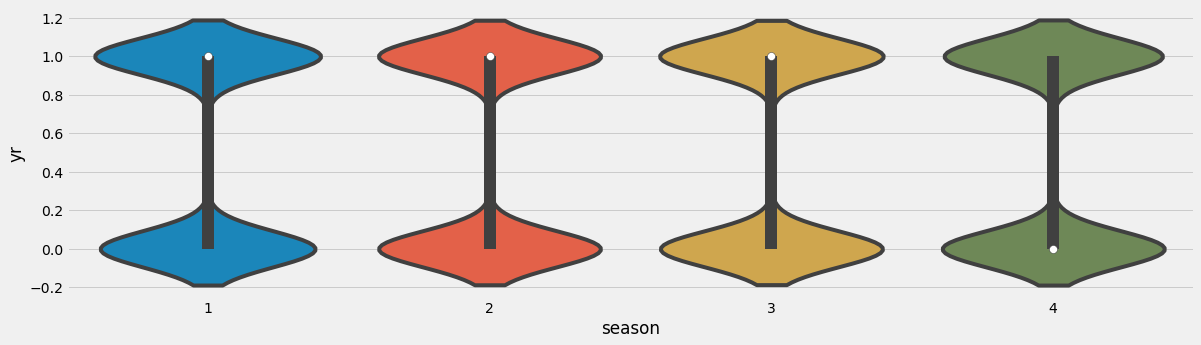

In [40]:
Show_Violin_Plot(df.season,df.yr,df)

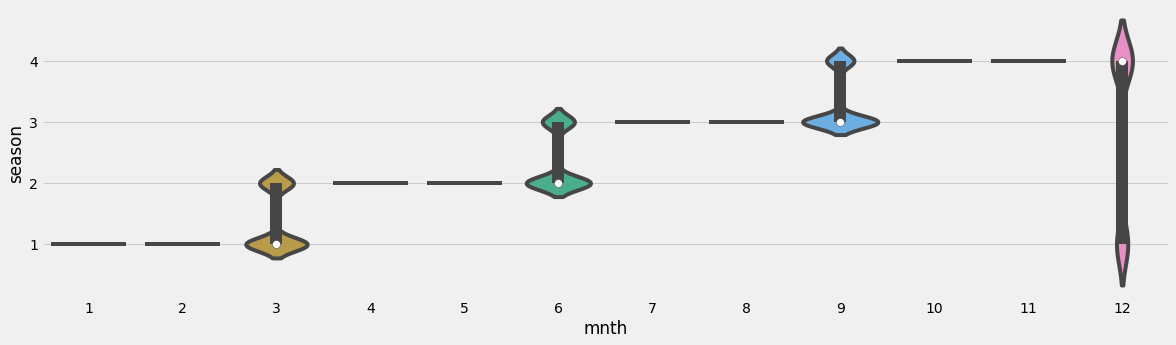

In [41]:
Show_Violin_Plot(df.mnth,df.season,df)

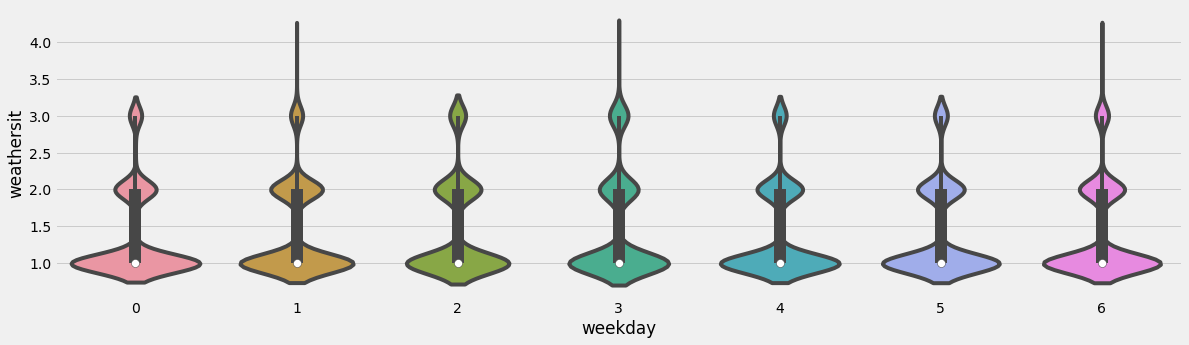

In [42]:
Show_Violin_Plot(df.weekday,df.weathersit,df)

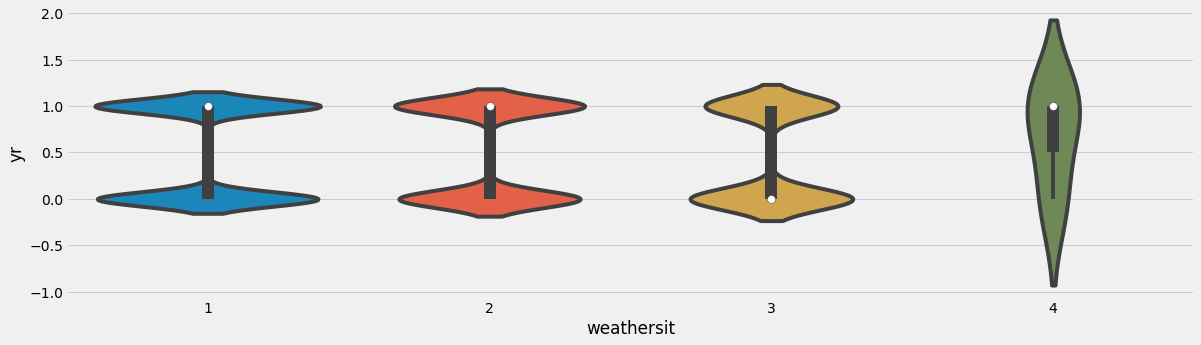

In [43]:
Show_Violin_Plot(df.weathersit,df.yr,df)

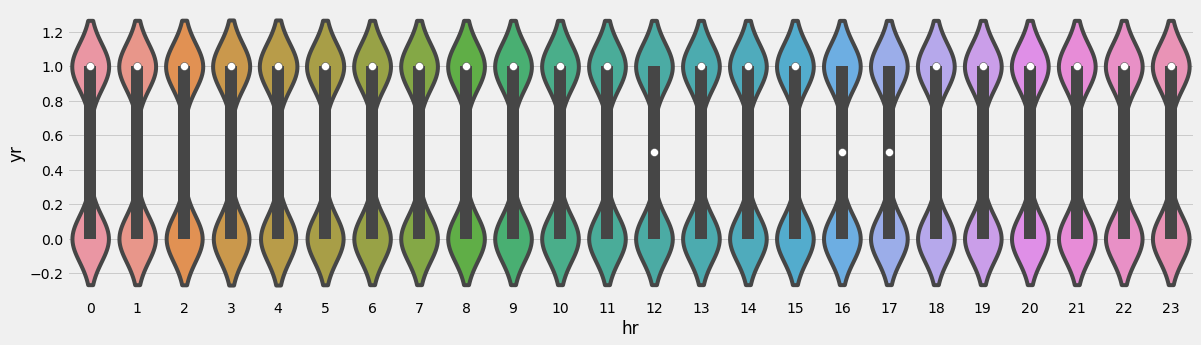

In [44]:
Show_Violin_Plot(df.hr,df.yr,df)

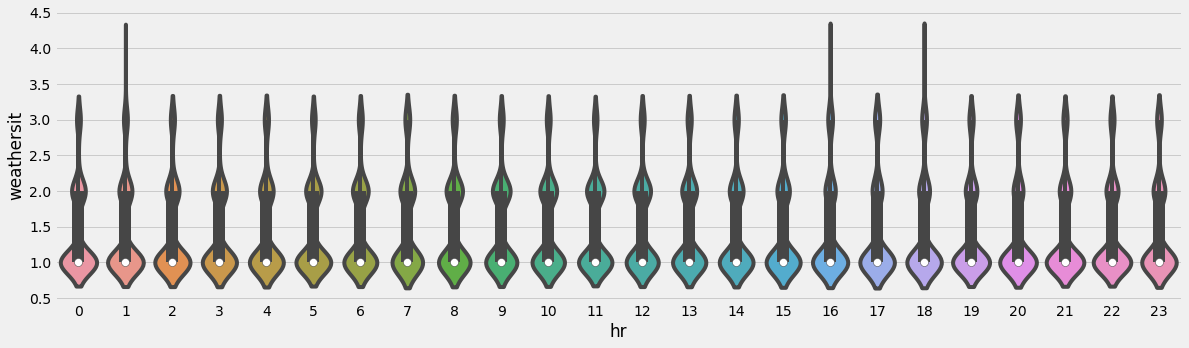

In [45]:
Show_Violin_Plot(df.hr,df.weathersit,df)

In [46]:
def Show_HeatMap(x):
    f,ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(x.corr(),annot=True,ax=ax);

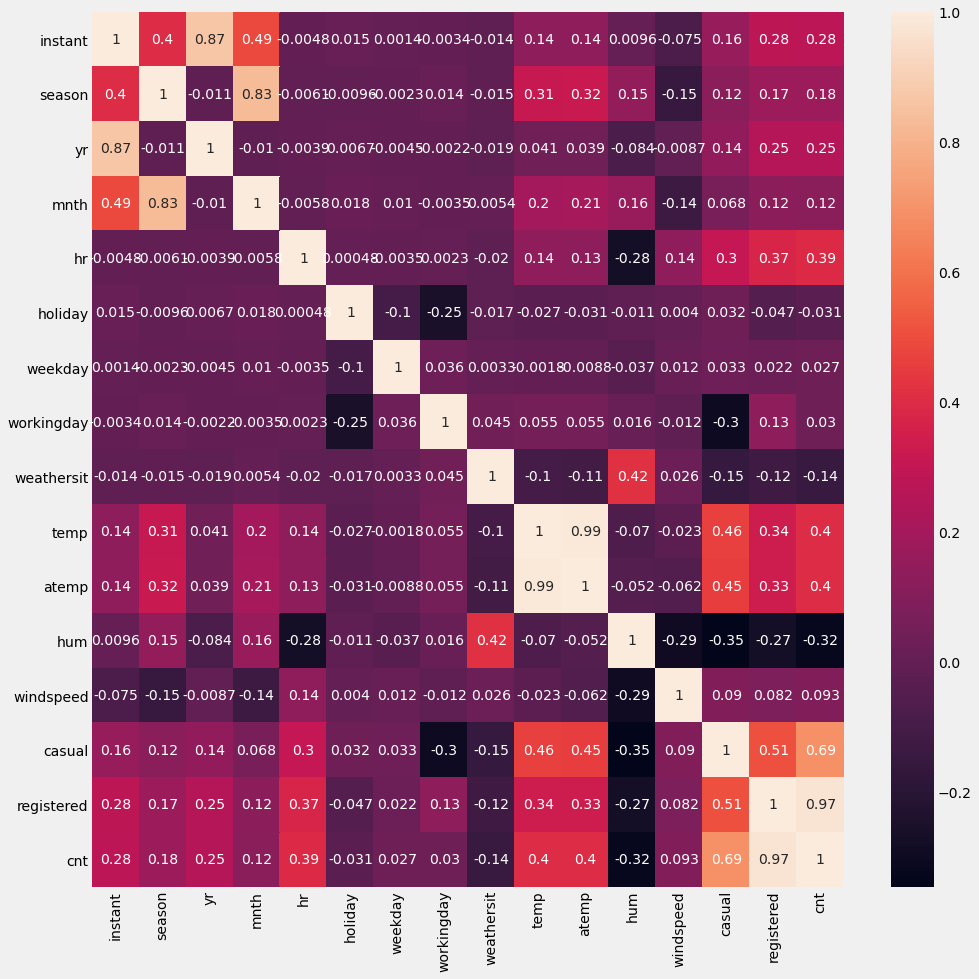

In [47]:
Show_HeatMap(df)

In [48]:
def Show_PairPlot(x):
    sns.pairplot(x)

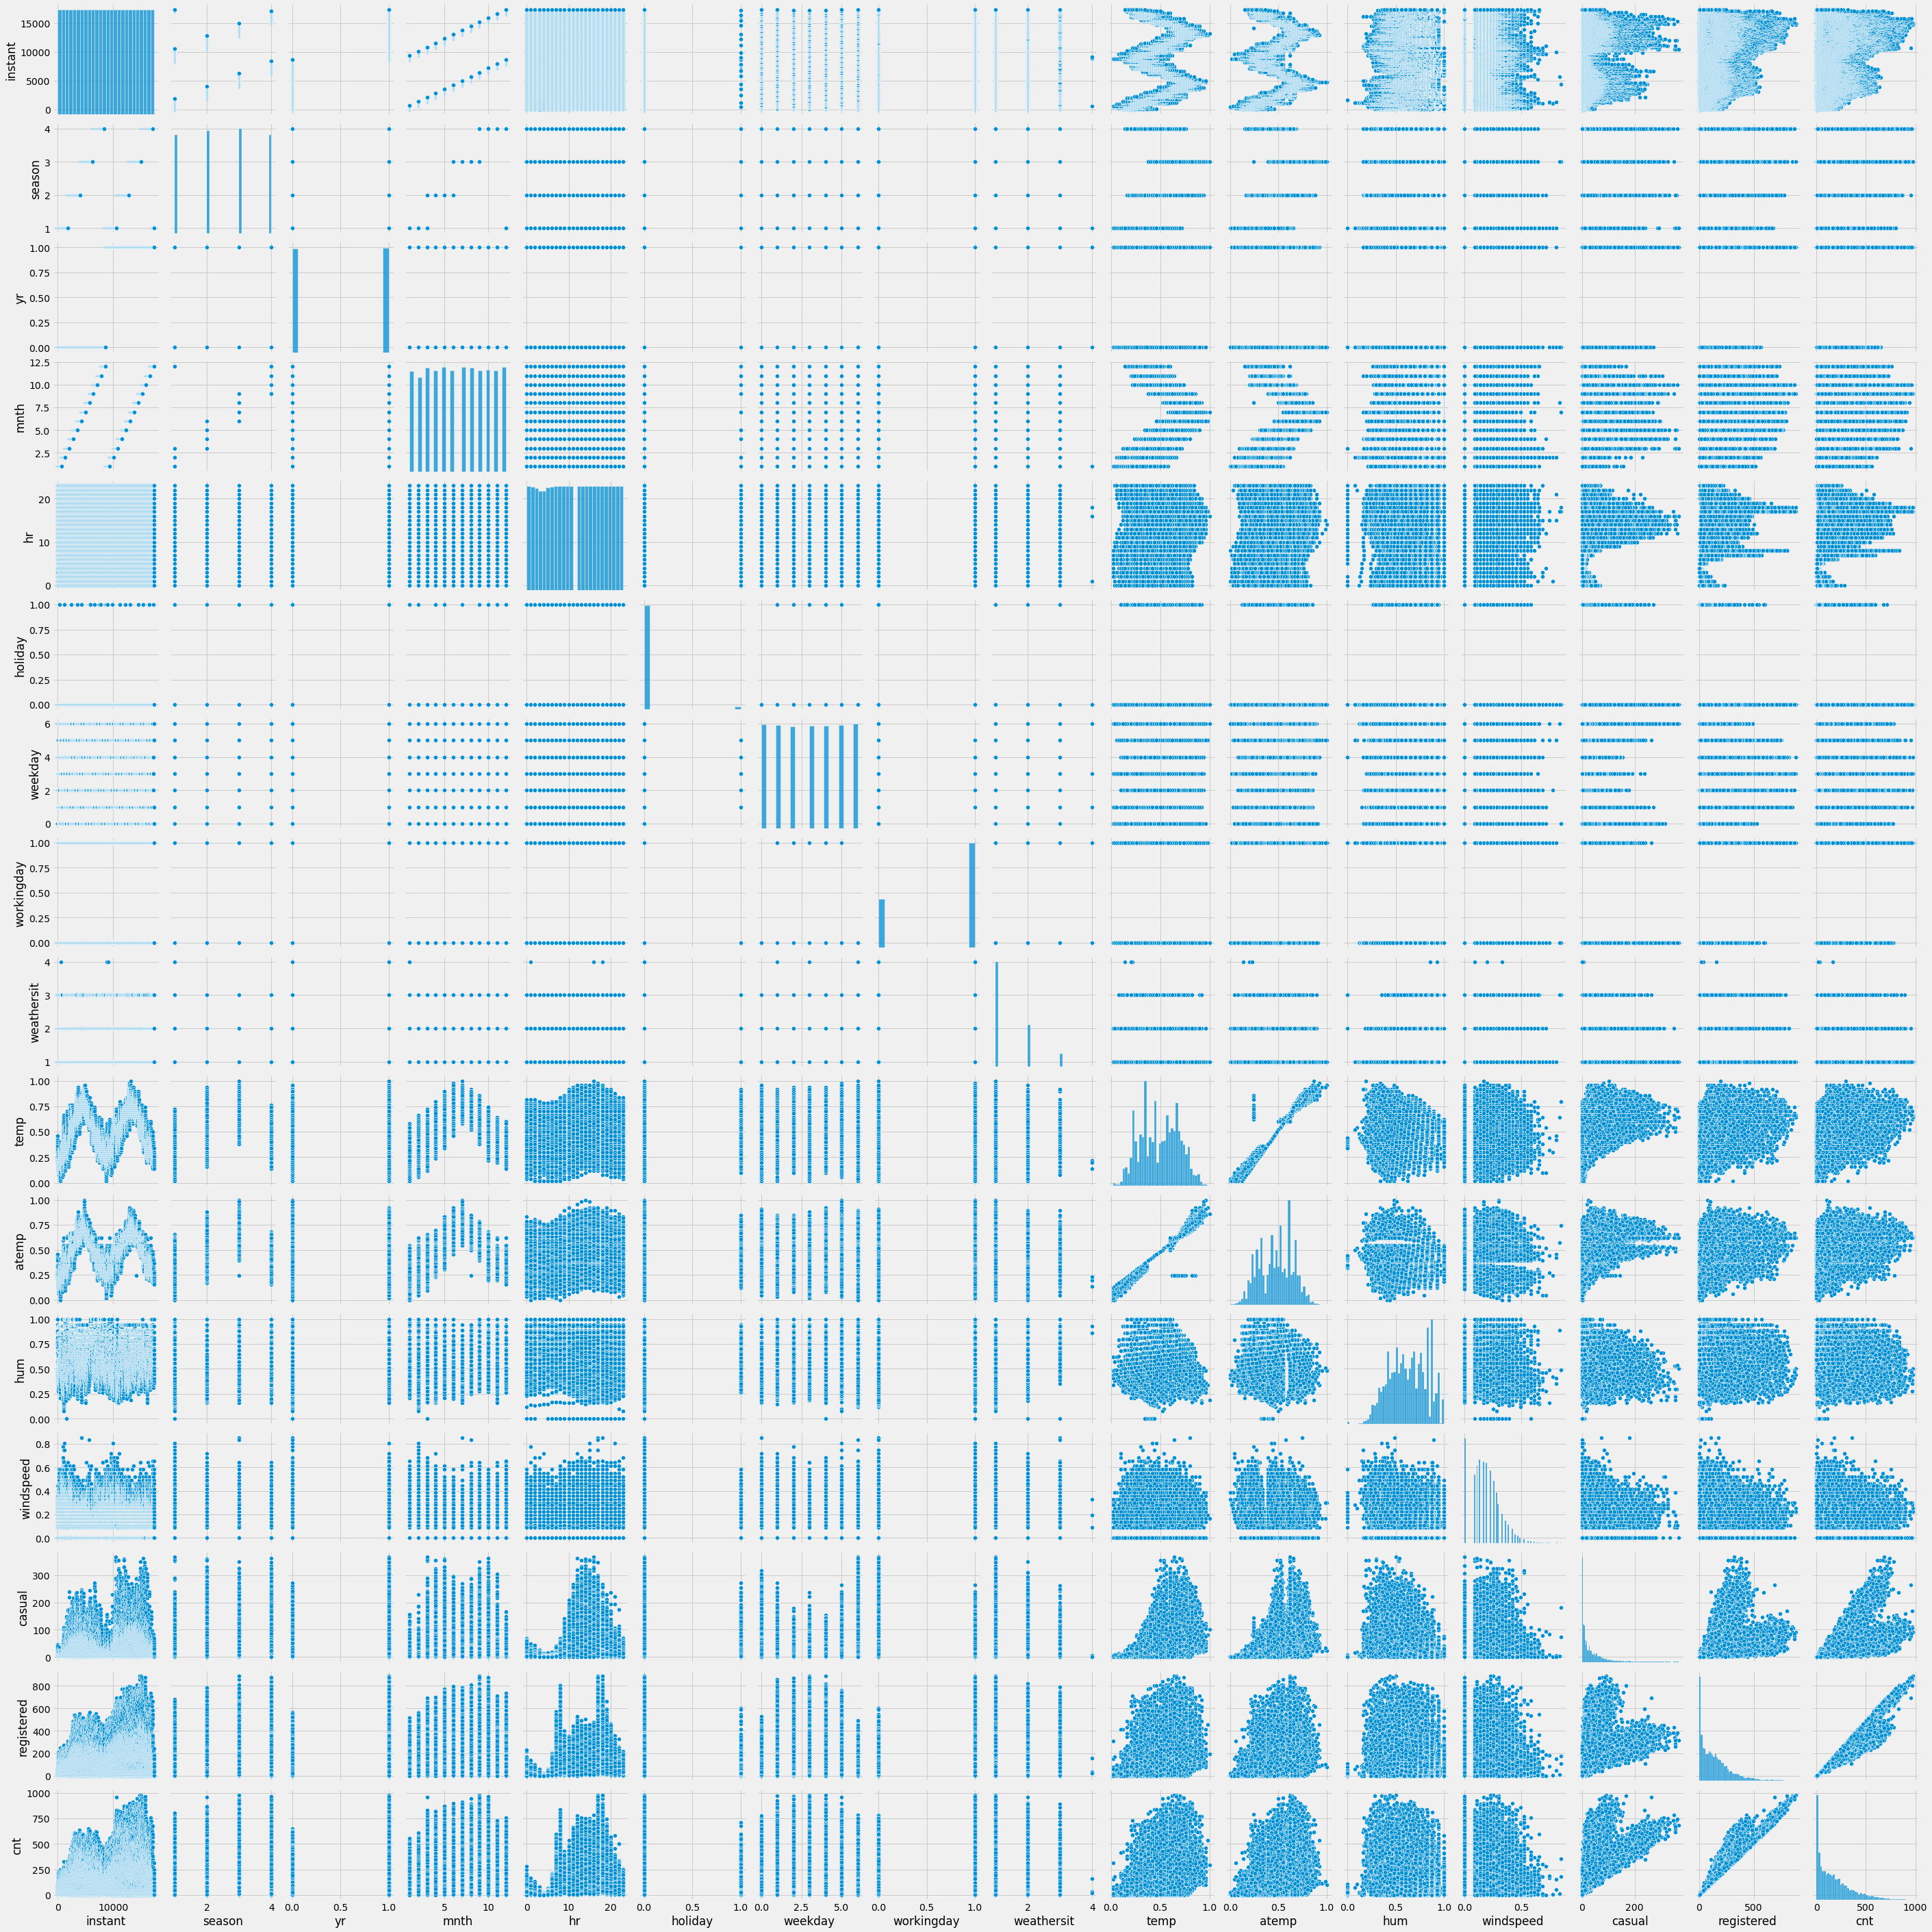

In [49]:
Show_PairPlot(df)

# Data Preprocessing

In [50]:
df['Year'] = df['dteday'].str.split('-').str[0]
df['Year'] = df['Year'].astype(int)

In [51]:
df['Month'] = df['dteday'].str.split('-').str[1]
df['Month'] = df['Month'].astype(int)

In [52]:
df['Date'] = df['dteday'].str.split('-').str[2]
df['Date'] = df['Date'].astype(int)

In [58]:
df = df.iloc[:,[18,17,16,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
df

IndexError: positional indexers are out-of-bounds

In [55]:
df = df.drop(['dteday'],axis=1)
df = df.drop(['yr'],axis=1)
df = df.drop(['mnth'],axis=1)

KeyError: "['dteday'] not found in axis"

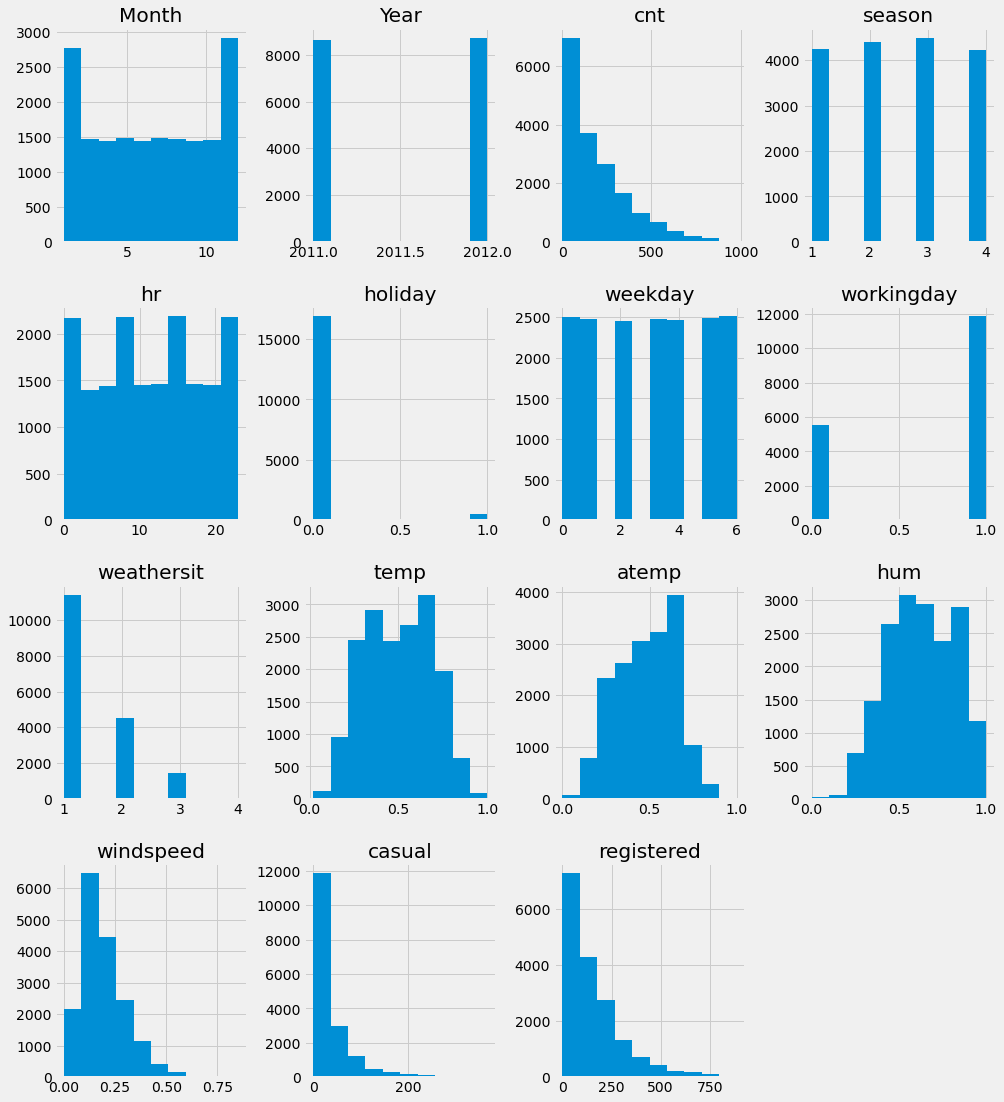

In [56]:
#plt.rcParams["figure.figsize"] = 20,18
show_hist(df)

# Feature Engineering

In [59]:
df1 = df.drop(['registered','season','temp','weathersit','weekday','windspeed','workingday'],axis=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(df1)

In [60]:
# df1['casual']= np.log1p(df1['casual'])

In [61]:
from scipy import stats
import pylab
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True,) 
skl_yeojohnson = pt.fit_transform(df)

In [62]:
skl_yeojohnson = pd.DataFrame(skl_yeojohnson)
skl_yeojohnson

0         1         2         3         4         5         6   \
0     -1.733283 -1.005134 -1.252934 -1.399107 -1.902877 -0.172112  1.399855   
1     -1.733283 -1.005134 -0.791386 -1.399107 -1.658943 -0.172112  1.399855   
2     -1.733283 -1.005134 -0.916496 -1.399107 -1.446865 -0.172112  1.399855   
3     -1.733283 -1.005134 -1.339644 -1.399107 -1.253144 -0.172112  1.399855   
4     -1.733283 -1.005134 -1.983013 -1.399107 -1.072020 -0.172112  1.399855   
...         ...       ...       ...       ...       ...       ...       ...   
17374  1.499635  0.994892 -0.040308 -1.399107  1.046188 -0.172112 -0.973769   
17375  1.499635  0.994892 -0.265252 -1.399107  1.167163 -0.172112 -0.973769   
17376  1.499635  0.994892 -0.256958 -1.399107  1.286616 -0.172112 -0.973769   
17377  1.499635  0.994892 -0.529789 -1.399107  1.404635 -0.172112 -0.973769   
17378  1.499635  0.994892 -0.669816 -1.399107  1.521297 -0.172112 -0.973769   

            7         8         9         10        11        12        13  \
0     -1.46690 -0.720808 -1.341502 -1.092321  0.947780 -1.770094 -0.906359   
1     -1.46690 -0.720808 -1.448199 -1.178011  0.894063 -1.770094 -0.396991   
2     -1.46690 -0.720808 -1.448199 -1.178011  0.894063 -1.770094 -0.655811   
3     -1.46690 -0.720808 -1.341502 -1.092321  0.626898 -1.770094 -0.906359   
4     -1.46690 -0.720808 -1.341502 -1.092321  0.626898 -1.770094 -1.704042   
...        ...       ...       ...       ...       ...       ...       ...   
17374  0.68171  1.304525 -1.235049 -1.262896 -0.160037 -0.122211 -0.208191   
17375  0.68171  1.304525 -1.235049 -1.262896 -0.160037 -0.122211 -0.396991   
17376  0.68171 -0.720808 -1.235049 -1.262896 -0.160037 -0.122211 -0.473044   
17377  0.68171 -0.720808 -1.235049 -1.178011 -0.366074 -0.388138 -0.105220   
17378  0.68171 -0.720808 -1.235049 -1.178011  0.099798 -0.388138 -0.154882   

             14  
0     -1.261875  
1     -0.804152  
2     -0.900775  
3     -1.371624  
4     -1.964542  
...         ...  
17374  0.053508  
17375 -0.178165  
17376 -0.159274  
17377 -0.552177  
17378 -0.717482  

[17379 rows x 15 columns]

In [63]:
skl_yeojohnson = skl_yeojohnson.iloc[:,[9,10,11,12,13,14]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
skl_yeojohnson = sc.fit_transform(skl_yeojohnson)

In [64]:
skl_yeojohnson = pd.DataFrame(skl_yeojohnson)
skl_yeojohnson

0         1         2         3         4         5
0     -1.341502 -1.092321  0.947780 -1.770094 -0.906359 -1.261875
1     -1.448199 -1.178011  0.894063 -1.770094 -0.396991 -0.804152
2     -1.448199 -1.178011  0.894063 -1.770094 -0.655811 -0.900775
3     -1.341502 -1.092321  0.626898 -1.770094 -0.906359 -1.371624
4     -1.341502 -1.092321  0.626898 -1.770094 -1.704042 -1.964542
...         ...       ...       ...       ...       ...       ...
17374 -1.235049 -1.262896 -0.160037 -0.122211 -0.208191  0.053508
17375 -1.235049 -1.262896 -0.160037 -0.122211 -0.396991 -0.178165
17376 -1.235049 -1.262896 -0.160037 -0.122211 -0.473044 -0.159274
17377 -1.235049 -1.178011 -0.366074 -0.388138 -0.105220 -0.552177
17378 -1.235049 -1.178011  0.099798 -0.388138 -0.154882 -0.717482

[17379 rows x 6 columns]

In [65]:
df1 = pd.DataFrame(df1)

In [66]:
df = pd.concat([df1,skl_yeojohnson],axis=1,ignore_index=True)
df

0         1         2         3         4         5         6   \
0     -1.610438 -1.005134 -0.956339 -1.670004 -0.172112 -1.093281  0.947372   
1     -1.610438 -1.005134 -0.824022 -1.525374 -0.172112 -1.181732  0.895539   
2     -1.610438 -1.005134 -0.868128 -1.380744 -0.172112 -1.181732  0.895539   
3     -1.610438 -1.005134 -0.972879 -1.236115 -0.172112 -1.093281  0.636370   
4     -1.610438 -1.005134 -1.039037 -1.091485 -0.172112 -1.093281  0.636370   
...         ...       ...       ...       ...       ...       ...       ...   
17374  1.588467  0.994892 -0.388478  1.077962 -0.172112 -1.269602 -0.141137   
17375  1.588467  0.994892 -0.553875  1.222591 -0.172112 -1.269602 -0.141137   
17376  1.588467  0.994892 -0.548361  1.367221 -0.172112 -1.269602 -0.141137   
17377  1.588467  0.994892 -0.708245  1.511851 -0.172112 -1.181732 -0.348473   
17378  1.588467  0.994892 -0.774403  1.656481 -0.172112 -1.181732  0.118032   

             7         8         9         10        11        12        13  
0     -0.662755 -1.341502 -1.092321  0.947780 -1.770094 -0.906359 -1.261875  
1     -0.561343 -1.448199 -1.178011  0.894063 -1.770094 -0.396991 -0.804152  
2     -0.622190 -1.448199 -1.178011  0.894063 -1.770094 -0.655811 -0.900775  
3     -0.662755 -1.341502 -1.092321  0.626898 -1.770094 -0.906359 -1.371624  
4     -0.723603 -1.341502 -1.092321  0.626898 -1.770094 -1.704042 -1.964542  
...         ...       ...       ...       ...       ...       ...       ...  
17374 -0.500495 -1.235049 -1.262896 -0.160037 -0.122211 -0.208191  0.053508  
17375 -0.561343 -1.235049 -1.262896 -0.160037 -0.122211 -0.396991 -0.178165  
17376 -0.581625 -1.235049 -1.262896 -0.160037 -0.122211 -0.473044 -0.159274  
17377 -0.459930 -1.235049 -1.178011 -0.366074 -0.388138 -0.105220 -0.552177  
17378 -0.480213 -1.235049 -1.178011  0.099798 -0.388138 -0.154882 -0.717482  

[17379 rows x 14 columns]

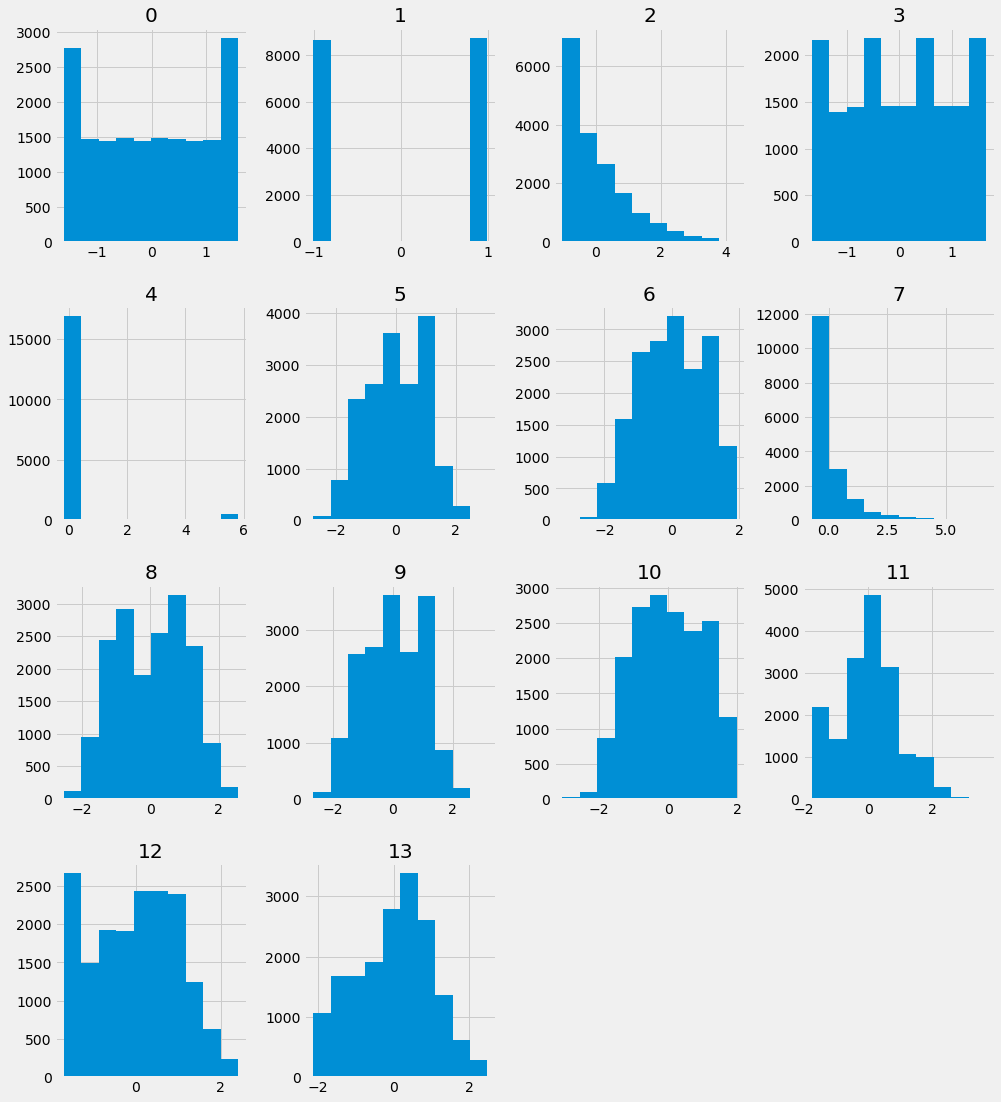

In [67]:
show_hist(df)

In [68]:
x = df.drop([2],axis=1)
y = df[2]

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

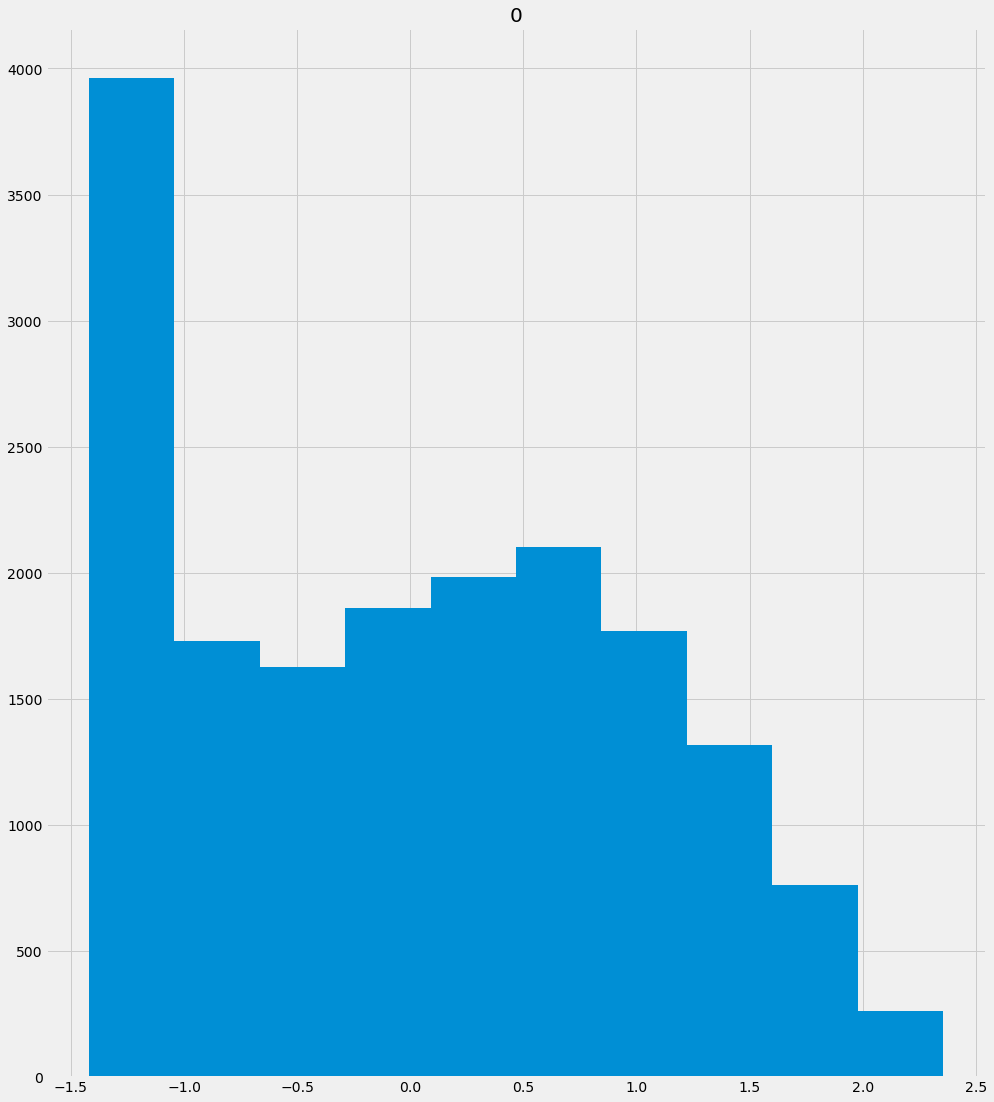

In [69]:
y = pd.DataFrame(y)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True,) 
y = pt.fit_transform(y)
y = pd.DataFrame(y)
y.hist()

# Train Test Split

In [70]:
x=x.drop([4],axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

# Model Building

In [72]:
import statsmodels.api as sm
model2 =sm.OLS(y_train,x_train).fit()

In [73]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      0   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          5.054e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                        0.00
Time:                        07:36:27   Log-Likelihood:                          6625.7
No. Observations:               12165   AIC:                                 -1.323e+04
Df Residuals:                   12153   BIC:                                 -1.314e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0040      0.001      2.918      0.004       0.001       0.007
1              0.0037      0.001      2.776      0.006       0.001       0.006
3             -0.0324      0.002    -20.693      0.000      -0.035      -0.029
5              0.1656      0.093      1.785      0.074      -0.016       0.347
6              0.0517      0.064      0.804      0.422      -0.074       0.178
7              0.1844      0.002     80.050      0.000       0.180       0.189
8             -0.0189      0.009     -2.173      0.030      -0.036      -0.002
9             -0.1260      0.094     -1.346      0.178      -0.309       0.058
10            -0.0616      0.064     -0.958      0.338      -0.188       0.064
11            -0.0020      0.001     -1.459      0.145      -0.005       0.001
12             0.0204      0.003      6.041      0.000       0.014       0.027
13             0.8623      0.002    386.643      0.000       0.858       0.867
==============================================================================
Omnibus:                      443.758   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.371
Skew:                           0.423   Prob(JB):                    4.57e-118
Kurtosis:                       3.591   Cond. No.                         223.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

# Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=0, normalize=False)
LR =lr.fit(x_train,y_train)

In [75]:
LR_Pred = lr.predict(x_test)

In [76]:
from sklearn import metrics
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test,LR_Pred))
LR_RMSE

0.137521985746174

In [77]:
from sklearn.metrics import r2_score
LR_r2_score = r2_score(y_test,LR_Pred)
LR_r2_score

0.9809611299187992

# Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000,random_state=42)
reg=regressor.fit(x_train,y_train)

In [79]:
RF_pred=regressor.predict(x_test)

In [80]:
from sklearn import metrics
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test,RF_pred))
RF_RMSE

0.006504678914589604

In [81]:
from sklearn.metrics import r2_score
RF_r2_score = r2_score(y_test,RF_pred)
RF_r2_score

0.9999574059802183

# XGBoost Model

In [82]:
from xgboost import XGBRegressor
xg_reg =XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 6, 
                          alpha = 7, n_estimators = 10000)
xg_reg.fit(x_train,y_train)

[07:48:13] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=7, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [83]:
xg_preds = xg_reg.predict(x_test)

In [84]:
from sklearn import metrics
xgb_RMSE = np.sqrt(metrics.mean_squared_error(y_test,xg_preds))
xgb_RMSE

0.06221599073026363

In [85]:
from sklearn.metrics import r2_score
xgb_r2_score = r2_score(y_test,xg_preds)
xgb_r2_score

0.9961032643625392

# KNN Regressor Model

In [86]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors = 21,  weights = 'distance', p=1)
reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [90]:
KNN_pred = reg.predict(x_test)

In [88]:
from sklearn import metrics
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test,KNN_pred))
KNN_RMSE

0.006504678914589604

In [89]:
from sklearn.metrics import r2_score
KNN_r2_score = r2_score(y_test,KNN_pred)
KNN_r2_score

0.9999574059802183

# Ada Boost Model

In [91]:
from sklearn.ensemble import AdaBoostRegressor
Ada_reg =AdaBoostRegressor(learning_rate = 0.10,base_estimator =None ,loss = 'linear',n_estimators = 10000)
Ada_reg.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=10000)

In [92]:
Ada_pred = Ada_reg.predict(x_test)

In [93]:
from sklearn import metrics
Ada_RMSE = np.sqrt(metrics.mean_squared_error(y_test,Ada_pred))
Ada_RMSE

0.11050427536650888

In [94]:
from sklearn.metrics import r2_score
Ada_r2_score = r2_score(y_test,Ada_pred)
Ada_r2_score

0.9877070797845139

# Desicion Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
Dtree_reg = DecisionTreeRegressor()
Dtree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [96]:
Dtree_pred = Dtree_reg.predict(x_test)

In [97]:
from sklearn import metrics
Dtree_RMSE = np.sqrt(metrics.mean_squared_error(y_test,Dtree_pred))
Dtree_RMSE

0.016204942287495104

In [98]:
from sklearn.metrics import r2_score
Dtree_r2_score = r2_score(y_test,Dtree_pred)
Dtree_r2_score

0.9997356423526458

# CatBoost Regressor Model

In [100]:
from CatBoost import CatBoostRegressor
CatBoost = CatBoostRegressor()
CatBoost.fit(x_train,y_train)

ModuleNotFoundError: No module named 'CatBoost'

In [ ]:
CatBoost_pred = CatBoost.predict(x_test)

In [ ]:
from sklearn import metrics
CatBoost_RMSE = np.sqrt(metrics.mean_squared_error(y_test,CatBoost_pred))
CatBoost_RMSE

In [ ]:
from sklearn.metrics import r2_score
CatBoost_r2_score = r2_score(y_test,CatBoost_pred)
CatBoost_r2_score

# Light Gradient Boosting Model

In [ ]:
y_train = y_train.astype(int)

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(n_estimators=10000,learning_rate=0.1)
model.fit(x_train,y_train)

In [ ]:
lgb_pred  = model.predict(x_test)

In [ ]:
from sklearn import metrics
lgb_RMSE = np.sqrt(metrics.mean_squared_error(y_test,lgb_pred))
lgb_RMSE

In [ ]:
from sklearn.metrics import r2_score
lgb_r2_score = r2_score(y_test,lgb_pred)
lgb_r2_score

# Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
Extr = ExtraTreesRegressor(n_estimators=1000,min_samples_split=6,n_jobs=3,verbose=5)
Extr.fit(x_train,y_train)

In [ ]:
Extr_pred  = model.predict(x_test)

In [ ]:
from sklearn import metrics
Extr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,Extr_pred))
Extr_RMSE

In [ ]:
from sklearn.metrics import r2_score
Extr_r2_score = r2_score(y_test,Extr_pred)
Extr_r2_score

# SVM Regressor Model

In [ ]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='poly')
svr_regressor = regressor.fit(x_train,y_train)

In [ ]:
svr_pred  = model.predict(x_test)

In [ ]:
from sklearn import metrics
svr_RMSE = np.sqrt(metrics.mean_squared_error(y_test,svr_pred))
svr_RMSE

In [ ]:
from sklearn.metrics import r2_score
svr_r2_score = r2_score(y_test,svr_pred)
svr_r2_score

# Best Model

In [ ]:
Best_Model ={'Model':['LinearRegression','RandomForestRegressor', 'XGBoost Regressor','KNN Regressor','AdaBoost Regressor','Decision_Tree Regressor','Lgb Regressor','ExtraTree Regressor','SupportVector Regressor'],
        'R2_Score':[LR_r2_score,RF_r2_score,xgb_r2_score,KNN_r2_score,Ada_r2_score,Dtree_r2_score,lgb_r2_score,Extr_r2_score,svr_r2_score],'RMSE':[LR_RMSE,RF_RMSE,xgb_RMSE,KNN_RMSE,Ada_RMSE,Dtree_RMSE,lgb_RMSE,Extr_RMSE,svr_RMSE]}
Best_Model =pd.DataFrame(Best_Model)
Best_Model=Best_Model.set_index('Model')
Best_Model